<a href="https://colab.research.google.com/github/rohimatun/2025-Pengolahan-Citra-TI2B/blob/main/Jobsheet_5_Rohimatun_Nurin_Nadhifah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 5: Mengukur Kemiripan Citra dan Penerapannya dalam Pengenalan Pola

Rohimatun Nurin Nadhifah / TI-2B / 4.33.23.1.22

## P1. Menghitung Jarak Berbasis Piksel (Euclidean & Manhattan)

Jarak Euclidean antara patch1 dan patch2: 24.7650
Jarak Euclidean antara patch1 dan patch3: 5.0000
Jarak Manhattan antara patch1 dan patch2: 936.4392
Jarak Manhattan antara patch1 dan patch3: 250.0000


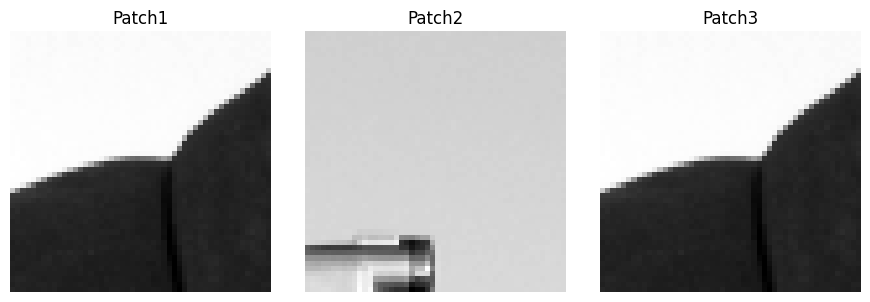

In [ ]:
import numpy as np
from skimage import data, img_as_float
from scipy.spatial import distance
import matplotlib.pyplot as plt

# 1. Buat dua patch citra sederhana atau ambil dari citra asli
image = img_as_float(data.camera())
patch1 = image[100:150, 100:150]
patch2 = image[100:150, 300:350]  # Patch dari lokasi berbeda
patch3 = patch1 + 0.1 # Patch1 dengan sedikit noise/perubahan intensitas
patch3 = np.clip(patch3, 0, 1)    # Pastikan nilai tetap di [0, 1]

# 2. Flatten patch menjadi vektor 1D
vec1 = patch1.flatten()
vec2 = patch2.flatten()
vec3 = patch3.flatten()

# 3. Hitung jarak Euclidean
dist_12_12 = distance.euclidean(vec1, vec2)
dist_12_13 = distance.euclidean(vec1, vec3)

# 4. Hitung jarak Manhattan (L1 - disebut 'cityblock' di scipy)
dist_11_12 = distance.cityblock(vec1, vec2)
dist_11_13 = distance.cityblock(vec1, vec3)

# 5. tampilkan hasil dan patch
print(f"Jarak Euclidean antara patch1 dan patch2: {dist_12_12:.4f}")
print(f"Jarak Euclidean antara patch1 dan patch3: {dist_12_13:.4f}")
print(f"Jarak Manhattan antara patch1 dan patch2: {dist_11_12:.4f}")
print(f"Jarak Manhattan antara patch1 dan patch3: {dist_11_13:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].imshow(patch1, cmap='gray')
axes[0].set_title('Patch1')
axes[0].axis('off')
axes[1].imshow(patch2, cmap='gray')
axes[1].set_title('Patch2')
axes[1].axis('off')
axes[2].imshow(patch3, cmap='gray')
axes[2].set_title('Patch3')
axes[2].axis('off')
plt.tight_layout()
plt.show()

## P2. Menghitung Cosine Similarity antara Histogram Warna

Cosine Similarity antara image1 (Austonaut) dan image2 (Coffee): 0.8156
Cosine Similarity antara image1 (Austonaut) dan image3 (Austonaut): 1.0000
Cosine Similarity antara image1 (Austonaut) dan image4 (Downsampled Austonaut): 1.0000


<function matplotlib.pyplot.show(close=None, block=None)>

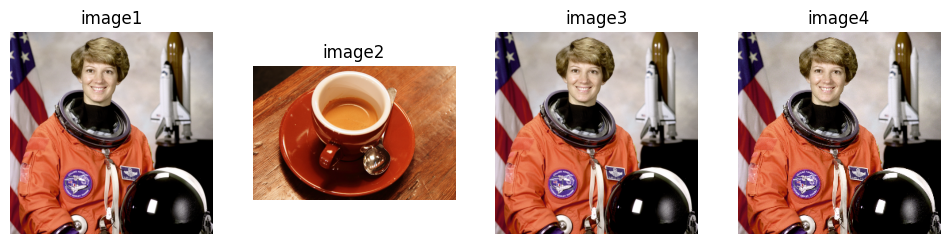

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_ubyte, io, color
from scipy.spatial import distance

# Fungsi untuk menghitung histogram RGB gabungan
def calculate_rgb_histogram(image, bins=16):
  img_uint8 = img_as_ubyte(image)
  hist_r, _ = np.histogram(img_uint8[:, :, 0].ravel(), bins=bins, range=(0, 256))
  hist_g, _ = np.histogram(img_uint8[:, :, 1].ravel(), bins=bins, range=(0, 256))
  hist_b, _ = np.histogram(img_uint8[:, :, 2].ravel(), bins=bins, range=(0, 256))

  # gabungan histogram R, G, B menjadi satu vektor fitur
  hist_combined = np.concatenate((hist_r, hist_g, hist_b))
  # Normalisasi (opsional, tapi sering digunakan)
  hist_combined = hist_combined.astype(float) / np.sum(hist_combined)
  return hist_combined

# 1. Muat dua citra berwarna
try:
  # Gunakan citra berbeda dari skimage atau file anda
  image1 = data.astronaut()
  image2 = data.coffee()  # Citra yang berbeda
  image3 = data.astronaut() # Citra yang sama (untuk perbandingan)
  image4 = image1[::2, ::2, :]  # Versi downsampled dari image1
except Exception as e:
  print(f"Gagal memuat data skimage: {e}. Membuat citra dummy.")
  image1 = np.random.rand(100, 100, 3)
  image2 = np.random.rand(100, 100, 3) * 0.5
  image3 = image1.copy()
  image4 = image1[::2, ::2, :]

# 2. Hitung histogram untuk setiap citra
hist1 = calculate_rgb_histogram(image1)
hist2 = calculate_rgb_histogram(image2)
hist3 = calculate_rgb_histogram(image3)
hist4 = calculate_rgb_histogram(image4)

# 3. Hitung cosine similarity (1 - cosine distance)
# scipy.spatial.distance.cosine menghitung jarak (1- similarity)
sim_12 = 1 - distance.cosine(hist1, hist2)
sim_13 = 1 - distance.cosine(hist1, hist3)
sim_14 = 1 - distance.cosine(hist1, hist4)

# 4. Tampilkan hasil
print(f"Cosine Similarity antara image1 (Austonaut) dan image2 (Coffee): {sim_12:.4f}")
print(f"Cosine Similarity antara image1 (Austonaut) dan image3 (Austonaut): {sim_13:.4f}")
print(f"Cosine Similarity antara image1 (Austonaut) dan image4 (Downsampled Austonaut): {sim_14:.4f}")

# Visualisasi (opsional)
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].imshow(image1)
axes[0].set_title('image1')
axes[0].axis('off')
axes[1].imshow(image2)
axes[1].set_title('image2')
axes[1].axis('off')
axes[2].imshow(image3)
axes[2].set_title('image3')
axes[2].axis('off')
axes[3].imshow(image4)
axes[3].set_title('image4')
axes[3].axis('off')
plt.show

## P3. Menghitung Structural Similarity Index (SSIM)

SSIM (Ref vs Same): 1.0000
SSIM (Ref vs Noisy): 0.2965
SSIM (Ref vs Contrast): 0.9651
SSIM (Ref vs Blurred): 0.8027


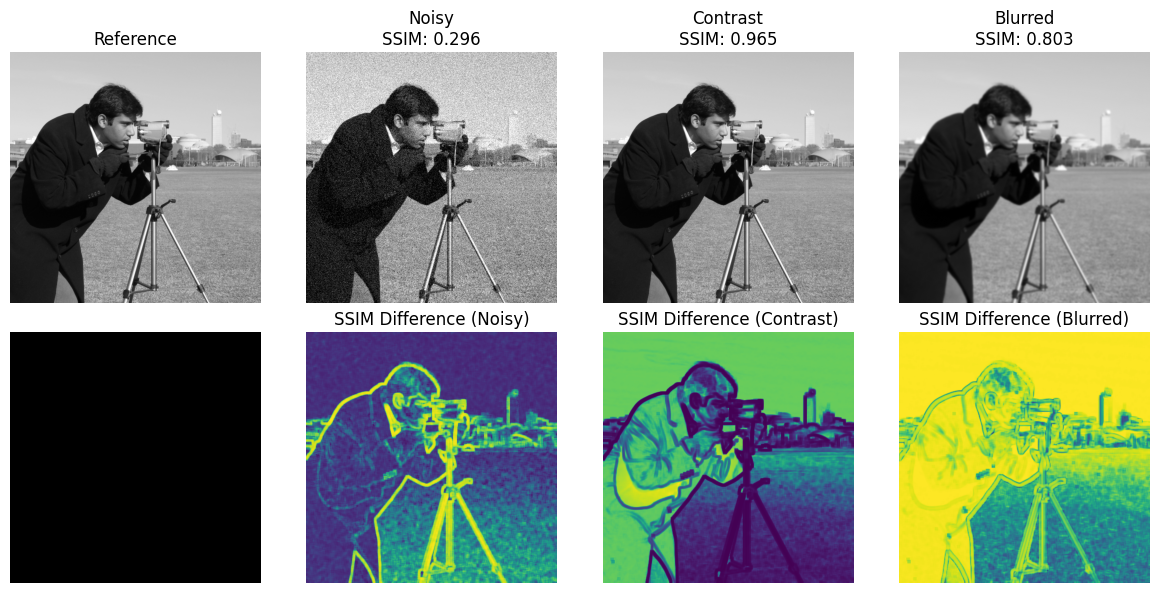

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.transform import resize
from skimage.util import random_noise

# 1. Muat citra referensi
image_ref = img_as_float(data.camera())

# 2. Buat beberapa versi citra yang 'terdistorsi'
# a) Citra yang sama (SSIM harus 1)
image_same = image_ref.copy()
# b) Citra dengan noise Gaussian
image_noisy = random_noise(image_ref, mode='gaussian', var=0.01)
# c) Citra dengan kontras berbeda (contoh: dikalikan skalar)
image_contrast = np.clip(image_ref * 0.8, 0, 1)
# d) Citra yang diblur
from skimage.filters import gaussian
image_blurred = gaussian(image_ref, sigma=1.5, channel_axis=None)   # channel_axis=None jika grayscale

# 3. Hitung SSIM antara citra referensi dan citra terdistorsi
# Pastikan dimensi citra sama jika diperlukan
# SSIM memerlukan data_range
data_range = image_ref.max() - image_ref.min()

ssim_same, _ = ssim(image_ref, image_same, data_range=data_range, full=True)
ssim_noisy, diff_noisy = ssim(image_ref, image_noisy, data_range=data_range, full=True)
ssim_contrast, diff_contrast = ssim(image_ref, image_contrast, data_range=data_range, full=True)
ssim_blurred, diff_blurred = ssim(image_ref, image_blurred, data_range=data_range, full=True)
# 'full=True' mengembalikan citra perbedaan SSIM juga

# 4. Tampilkan hasi SSIM dan citra perbedaan (jika menarik)
print(f"SSIM (Ref vs Same): {ssim_same:.4f}")
print(f"SSIM (Ref vs Noisy): {ssim_noisy:.4f}")
print(f"SSIM (Ref vs Contrast): {ssim_contrast:.4f}")
print(f"SSIM (Ref vs Blurred): {ssim_blurred:.4f}")

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
ax = axes.ravel()
ax[0].imshow(image_ref, cmap='gray')
ax[0].set_title('Reference')
ax[0].axis('off')
ax[1].imshow(image_noisy, cmap='gray')
ax[1].set_title(f'Noisy\nSSIM: {ssim_noisy:.3f}')
ax[1].axis('off')
ax[2].imshow(image_contrast, cmap='gray')
ax[2].set_title(f'Contrast\nSSIM: {ssim_contrast:.3f}')
ax[2].axis('off')
ax[3].imshow(image_blurred, cmap='gray')
ax[3].set_title(f'Blurred\nSSIM: {ssim_blurred:.3f}')
ax[3].axis('off')

# Menampilkan peta perbedaan SSIm
ax[4].imshow(np.zeros_like(image_ref), cmap='gray')
ax[4].set_title('')
ax[4].axis('off')
ax[5].imshow(diff_noisy, cmap='viridis')
ax[5].set_title('SSIM Difference (Noisy)')
ax[5].axis('off')
ax[6].imshow(diff_contrast, cmap='viridis')
ax[6].set_title('SSIM Difference (Contrast)')
ax[6].axis('off')
ax[7].imshow(diff_blurred, cmap='viridis')
ax[7].set_title('SSIM Difference (Blurred)')
ax[7].axis('off')
plt.tight_layout()
plt.show()

## P4. Penerapan Template Matching

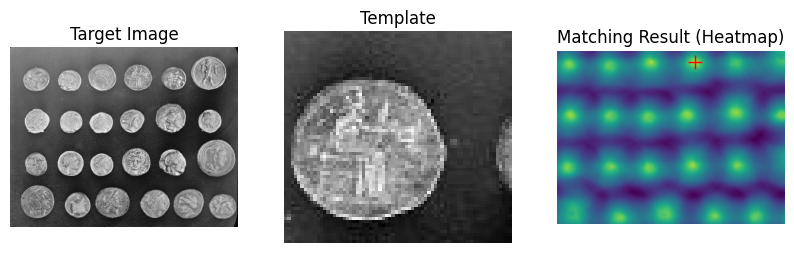

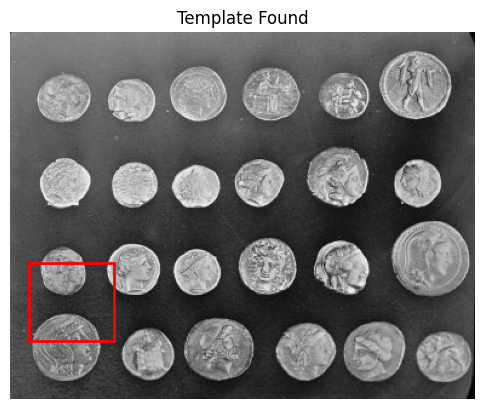

Template ditemukan di koordinat (y, x): (15, 190)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template

# 1. Muat citra target dan buat/muat citra template
image = data.coins()
# Ambil salah satu koin sebagai template (sesuaikan koordinat jika perlu)
template = image[15:80, 190:260]

# 2. Lakukan template matching menggunakan Normalized Cross-Corelation (metode default)
result = match_template(image, template)

# 3. Temukan lokasi dengan skor matching tertinggi
# np.argmax menemukan index linear, unravel_index mengubahnya ke koordinat 2D
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]   # Koordinat (x, y) dari sudut kiri atas template yang cocok

# 4. Visualisasi hasil
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Target Image')
ax[0].axis('off')
ax[1].imshow(template, cmap='gray')
ax[1].set_title('Template')
ax[1].axis('off')

# Menampilkan heatmap hasil matching (opsional)
ax[2].imshow(result, cmap='viridis')
ax[2].set_title('Matching Result (Heatmap)')
ax[2].axis('off')
# Tandai lokasi terbaik pada heatmap
ax[2].plot(x, y, 'r+', markersize=10)   # y, x karena ij adalah (row, col)

# Menampilkan kotak di lokasi terbaik pada citra asli (di plot terpisah agar lebih jelas)
fig2, ax_main = plt.subplots(figsize=(6, 6))
ax_main.imshow(image, cmap='gray')
ax_main.set_title('Template Found')
ax_main.axis('off')
h, w = template.shape
rect = plt.Rectangle((y, x), w, h, edgecolor='r', facecolor='none', lw=2)
ax_main.add_patch(rect)

plt.show()
print(f"Template ditemukan di koordinat (y, x): ({y}, {x})")

## P5. Simulasi COntent-Based Image Retrieval (CBIR) Sederhana

Memproses database citra...
- astronaut diproses.
- camera diproses.
- coffee diproses.
- coins diproses.
- chelsea diproses.

Hasil Retrieval (semakin ke kanan, semakin tidak mirip):
Rank 1: chelsea (Distance: 0.000)
Rank 2: coins (Distance: 0.288)
Rank 3: coffee (Distance: 0.359)
Rank 4: astronaut (Distance: 0.461)
Rank 5: camera (Distance: 0.602)


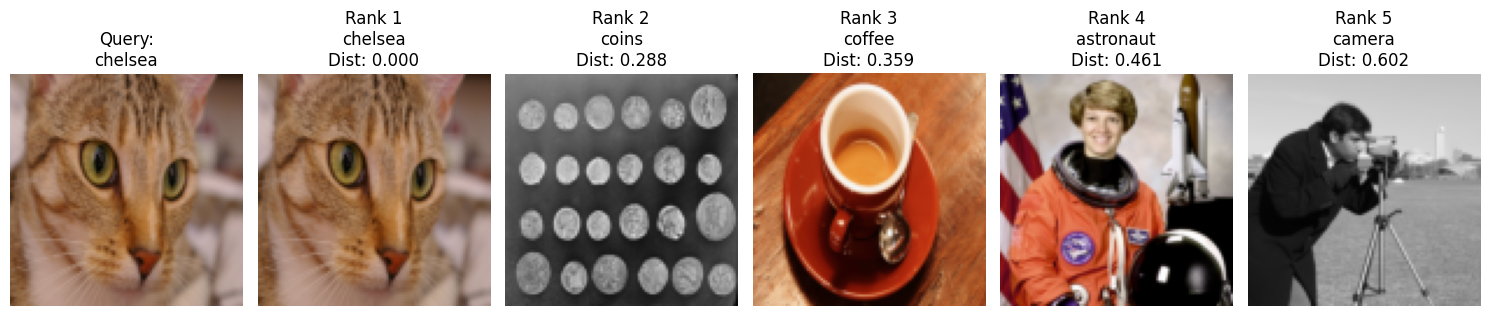

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, transform, img_as_ubyte
from scipy.spatial import distance

# Fungsi hitung histogram RGB
def calculate_rgb_histogram(image, bins=16):
    if image.dtype == float:
        image = img_as_ubyte(image)  # Konversi dari [0,1] float ke [0,255] uint8
    hist_r, _ = np.histogram(image[:, :, 0].ravel(), bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(image[:, :, 1].ravel(), bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(image[:, :, 2].ravel(), bins=bins, range=(0, 256))

    hist_combined = np.concatenate((hist_r, hist_g, hist_b)).astype(float)
    hist_sum = np.sum(hist_combined)
    if hist_sum > 0:
        hist_combined /= hist_sum  # Normalisasi L1
    return hist_combined

# Daftar nama citra dari skimage
image_db_names = ["astronaut", "camera", "coffee", "coins", "chelsea"]
database_images = []
database_hists = []

print("Memproses database citra...")
for name in image_db_names:
    try:
        img = getattr(data, name)()
        if img.ndim == 2:
            img = color.gray2rgb(img)
        img_resized = transform.resize(img, (100, 100), anti_aliasing=True)
        database_images.append(img_resized)
        database_hists.append(calculate_rgb_histogram(img_resized))
        print(f"- {name} diproses.")
    except Exception as e:
        print(f"Error memproses {name}: {e}")

# Pilih citra query
query_image_name = "chelsea"
query_index = image_db_names.index(query_image_name)
query_image = database_images[query_index]
query_hist = database_hists[query_index]

# Hitung jarak cosine ke semua citra
distances = []
for i, hist in enumerate(database_hists):
    dist = distance.cosine(query_hist, hist)
    distances.append(dist)

# Urutkan berdasarkan jarak terkecil
sorted_indices = np.argsort(distances)

# Tampilkan hasil
num_results_to_show = len(database_images)
fig, axes = plt.subplots(1, num_results_to_show + 1, figsize=(15, 3))

# Tampilkan query image
axes[0].imshow(query_image)
axes[0].set_title(f"Query:\n{query_image_name}")
axes[0].axis('off')

print("\nHasil Retrieval (semakin ke kanan, semakin tidak mirip):")
for i, idx in enumerate(sorted_indices):
    img_rank = i + 1  # Karena slot 0 untuk query
    ax = axes[img_rank]
    ax.imshow(database_images[idx])
    ax.set_title(f"Rank {img_rank}\n{image_db_names[idx]}\nDist: {distances[idx]:.3f}")
    ax.axis('off')
    print(f"Rank {img_rank}: {image_db_names[idx]} (Distance: {distances[idx]:.3f})")

plt.tight_layout()
plt.show()

## Tugas 1 Modifikasi Praktikum 5

Memproses database citra...
- astronaut diproses.
- camera diproses.
- coffee diproses.
- coins diproses.
- chelsea diproses.

Hasil Retrieval (Histogram + Cosine):
Rank 1: chelsea (Distance: 0.000)
Rank 2: coins (Distance: 0.288)
Rank 3: coffee (Distance: 0.359)
Rank 4: astronaut (Distance: 0.461)
Rank 5: camera (Distance: 0.602)


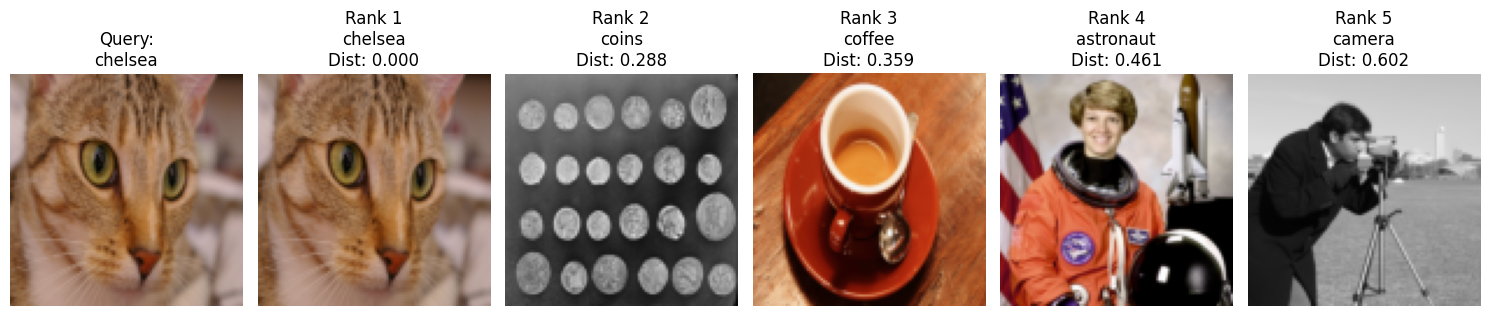


Hasil Retrieval (Mean RGB + Euclidean):
Rank 1: chelsea (Distance: 0.000)
Rank 2: astronaut (Distance: 12.776)
Rank 3: coffee (Distance: 45.003)
Rank 4: camera (Distance: 49.416)
Rank 5: coins (Distance: 53.809)


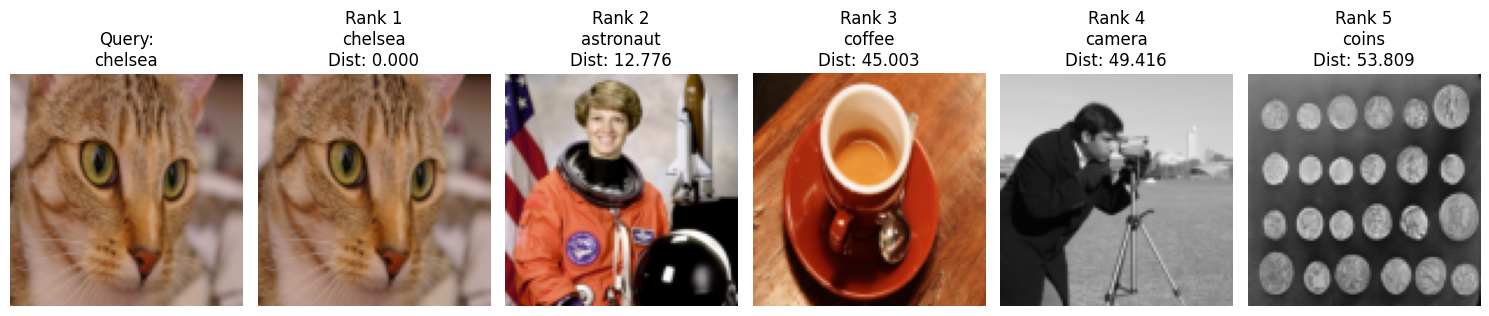

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, transform, img_as_ubyte
from scipy.spatial import distance

# Fungsi hitung histogram RGB (tetap dipakai untuk pembanding)
def calculate_rgb_histogram(image, bins=16):
    if image.dtype == float:
        image = img_as_ubyte(image)
    hist_r, _ = np.histogram(image[:, :, 0].ravel(), bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(image[:, :, 1].ravel(), bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(image[:, :, 2].ravel(), bins=bins, range=(0, 256))
    hist_combined = np.concatenate((hist_r, hist_g, hist_b)).astype(float)
    hist_sum = np.sum(hist_combined)
    if hist_sum > 0:
        hist_combined /= hist_sum  # Normalisasi L1
    return hist_combined

# Fungsi hitung rata-rata warna (fitur 3 dimensi)
def calculate_mean_rgb(image):
    if image.dtype == float:
        image = img_as_ubyte(image)
    mean_r = np.mean(image[:, :, 0])
    mean_g = np.mean(image[:, :, 1])
    mean_b = np.mean(image[:, :, 2])
    return np.array([mean_r, mean_g, mean_b])

# Database citra
image_db_names = ["astronaut", "camera", "coffee", "coins", "chelsea"]
database_images = []
database_hists = []
database_means = []

print("Memproses database citra...")
for name in image_db_names:
    try:
        img = getattr(data, name)()
        if img.ndim == 2:
            img = color.gray2rgb(img)
        img_resized = transform.resize(img, (100, 100), anti_aliasing=True)
        database_images.append(img_resized)
        database_hists.append(calculate_rgb_histogram(img_resized))
        database_means.append(calculate_mean_rgb(img_resized))
        print(f"- {name} diproses.")
    except Exception as e:
        print(f"Error memproses {name}: {e}")

# Pilih citra query
query_image_name = "chelsea"
query_index = image_db_names.index(query_image_name)
query_image = database_images[query_index]
query_hist = database_hists[query_index]
query_mean = database_means[query_index]

# --- Jarak Cosine Histogram ---
hist_distances = []
for hist in database_hists:
    dist = distance.cosine(query_hist, hist)
    hist_distances.append(dist)

# --- Jarak Euclidean Rata-rata RGB ---
mean_distances = []
for mean in database_means:
    dist = distance.euclidean(query_mean, mean)
    mean_distances.append(dist)

# --- Visualisasi hasil perbandingan retrieval ---
def plot_results(sorted_indices, distances, title_suffix):
    fig, axes = plt.subplots(1, len(sorted_indices) + 1, figsize=(15, 3))
    axes[0].imshow(query_image)
    axes[0].set_title(f"Query:\n{query_image_name}")
    axes[0].axis('off')

    print(f"\nHasil Retrieval ({title_suffix}):")
    for i, idx in enumerate(sorted_indices):
        ax = axes[i + 1]
        ax.imshow(database_images[idx])
        ax.set_title(f"Rank {i+1}\n{image_db_names[idx]}\nDist: {distances[idx]:.3f}")
        ax.axis('off')
        print(f"Rank {i+1}: {image_db_names[idx]} (Distance: {distances[idx]:.3f})")

    plt.tight_layout()
    plt.show()

# Urutkan dan tampilkan
hist_sorted_indices = np.argsort(hist_distances)
mean_sorted_indices = np.argsort(mean_distances)

# Tampilkan hasil retrieval berdasarkan histogram
plot_results(hist_sorted_indices, hist_distances, "Histogram + Cosine")

# Tampilkan hasil retrieval berdasarkan rata-rata RGB
plot_results(mean_sorted_indices, mean_distances, "Mean RGB + Euclidean")


## Tugas 2 Modifikasi Praktikum 4

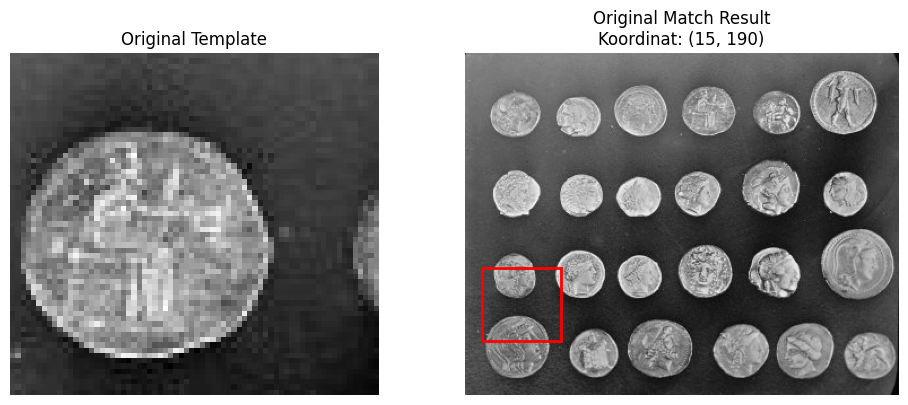

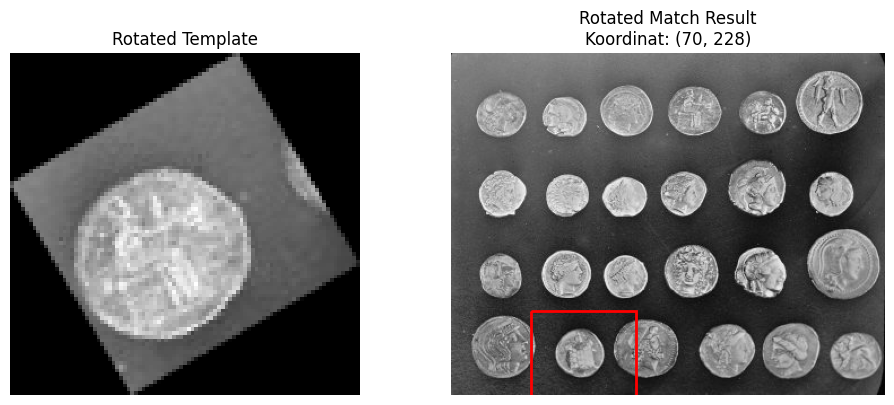

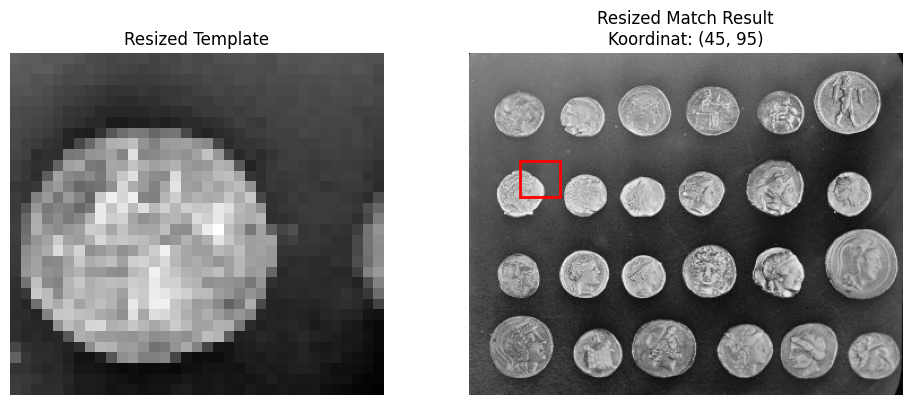

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template
from skimage.transform import rotate, resize

# 1. Muat citra target dan template
image = data.coins()
template = image[15:80, 190:260]  # Potong salah satu koin

# 2. Ubah template (rotasi dan resize)
template_rotated = rotate(template, angle=30, resize=True)
template_resized = resize(template, (template.shape[0]//2, template.shape[1]//2), anti_aliasing=True)

# 3. Matching template asli
result_orig = match_template(image, template)

# 4. Matching dengan template yang di-rotasi
result_rotated = match_template(image, template_rotated)

# 5. Matching dengan template yang di-resize
result_resized = match_template(image, template_resized)

# Fungsi bantu visualisasi hasil
def show_result(result, template_used, title):
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[::-1]
    h, w = template_used.shape
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].imshow(template_used, cmap='gray')
    ax[0].set_title(f"{title} Template")
    ax[0].axis('off')

    ax[1].imshow(image, cmap='gray')
    rect = plt.Rectangle((y, x), w, h, edgecolor='r', facecolor='none', lw=2)
    ax[1].add_patch(rect)
    ax[1].set_title(f"{title} Match Result\nKoordinat: ({y}, {x})")
    ax[1].axis('off')
    plt.tight_layout()
    plt.show()

# 6. Tampilkan hasil ketiga eksperimen
show_result(result_orig, template, "Original")
show_result(result_rotated, template_rotated, "Rotated")
show_result(result_resized, template_resized, "Resized")